In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [2]:
df_train = pd.read_csv('Dataset/train.txt')
df_test = pd.read_csv('Dataset/test.txt')

In [3]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
            'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']

In [4]:
df_train.columns= cols
df_test.columns= cols

In [5]:
df_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal


In [6]:
df_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,anomaly


In [7]:
df_train.shape, df_test.shape

((25191, 42), (22543, 42))

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25191 non-null  int64  
 1   protocol_type                25191 non-null  object 
 2   service                      25191 non-null  object 
 3   flag                         25191 non-null  object 
 4   src_bytes                    25191 non-null  int64  
 5   dst_bytes                    25191 non-null  int64  
 6   land                         25191 non-null  int64  
 7   wrong_fragment               25191 non-null  int64  
 8   urgent                       25191 non-null  int64  
 9   hot                          25191 non-null  int64  
 10  num_failed_logins            25191 non-null  int64  
 11  logged_in                    25191 non-null  int64  
 12  num_compromised              25191 non-null  int64  
 13  root_shell      

In [9]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
data = pd.concat([df_train, df_test], join= 'outer')
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal


In [11]:
data['class'].value_counts()

anomaly    24575
normal     23159
Name: class, dtype: int64

In [12]:
data['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [13]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [14]:
# cat_df=df.select_dtypes('object')
# cat_df.head(3)

In [15]:
# from sklearn.preprocessing import OneHotEncoder
# import scipy.sparse
# ohe= OneHotEncoder(sparse=False)

In [16]:
# onehot= ohe.fit_transform(cat_df)
# onehot

In [17]:
# onehot= onehot[:,1:]
# onehot

In [18]:
# pd.DataFrame(onehot)

In [19]:
num_vars = data.select_dtypes(exclude= 'object')
num_vars

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,0,0,0,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22539,0,317,938,0,0,0,0,0,1,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,54540,8314,0,0,0,2,0,1,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22541,0,42,42,0,0,0,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [21]:
scaled_val= ss.fit_transform(num_vars)

In [22]:
col = num_vars.columns
col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [23]:
scaled_val= pd.DataFrame(scaled_val, columns=col)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df=pd.DataFrame()

In [26]:
df['protocol_type']= le.fit_transform(data['protocol_type'])
df['service']= le.fit_transform(data['service'])
df['flag']= le.fit_transform(data['flag'])


In [27]:
df

,protocol_type,service,flag
0,2,41,9
1,1,46,5
2,1,22,9
3,1,22,9
4,1,46,1
...,...,...,...
47729,1,51,9
47730,1,22,9
47731,1,22,9
47732,2,11,9


In [28]:
df= pd.concat([scaled_val,df], axis=1)

In [29]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.121347,-0.009883,-0.042530,-0.013732,-0.077479,-0.013976,-0.091263,-0.099624,-0.846059,-0.019505,...,2.521112,2.405824,-0.261682,-0.510958,-0.501506,-0.490489,-0.467272,2,41,9
1,-0.121347,-0.009965,-0.042530,-0.013732,-0.077479,-0.013976,-0.091263,-0.099624,-0.846059,-0.019505,...,-0.178251,-0.456241,-0.261682,2.082352,2.074966,-0.490489,-0.467272,1,46,5
2,-0.121347,-0.009835,0.080697,-0.013732,-0.077479,-0.013976,-0.091263,-0.099624,1.181951,-0.019505,...,-0.423648,-0.358670,0.139656,-0.433158,-0.475742,-0.490489,-0.439740,1,22,9
3,-0.121347,-0.009853,-0.036182,-0.013732,-0.077479,-0.013976,-0.091263,-0.099624,1.181951,-0.019505,...,-0.423648,-0.456241,-0.261682,-0.510958,-0.501506,-0.490489,-0.467272,1,22,9
4,-0.121347,-0.009965,-0.042530,-0.013732,-0.077479,-0.013976,-0.091263,-0.099624,-0.846059,-0.019505,...,-0.080092,-0.456241,-0.261682,-0.510958,-0.501506,2.355038,2.285932,1,46,1


In [30]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag'],
      dtype='object')

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, svd_solver='full')

In [32]:
pca.fit(df)

PCA(n_components=10, svd_solver='full')

In [33]:
x_pca= pca.transform(df)

In [34]:
x_pca.shape

(47734, 10)

In [35]:
x= pd.DataFrame(x_pca, columns=['duration','src_bytes','dst_bytes','logged_in','count','srv_count','dst_host_count','protocol_type', 'service', 'flag'])

In [36]:
x.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,protocol_type,service,flag
0,10.349087,-2.169890,-0.028072,-0.176388,-3.078108,0.760019,1.371169,-1.122058,1.160711,0.163397
1,15.689014,1.272310,-4.160266,0.040412,0.536530,0.254236,-0.226416,0.101015,-0.154415,0.020215
2,-8.830658,-2.262145,0.343558,-0.070314,1.097461,0.290398,-0.363367,-0.128236,0.255875,0.062438
3,-8.808645,-2.126137,0.497021,-0.132084,0.739635,-1.083692,-0.211331,-0.244531,0.377067,0.043298
4,15.959173,5.944702,2.795019,-0.105985,0.711735,-0.572589,-0.335156,0.489300,-0.612819,0.057448


In [37]:
y= data['class']
y

0         normal
1        anomaly
2         normal
3         normal
4        anomaly
          ...   
22538     normal
22539     normal
22540    anomaly
22541     normal
22542    anomaly
Name: class, Length: 47734, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
X_train

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,protocol_type,service,flag
23725,-8.859727,-2.431662,0.884628,-0.087819,0.589645,0.688188,-0.406463,-0.019811,0.117615,0.105772
25249,-8.805542,-2.132754,0.488299,-0.122519,0.908885,-1.065214,-0.095427,-0.353155,0.479305,0.187779
29325,-8.845974,-2.344520,0.780104,-0.089559,0.976166,0.299743,-0.324414,-0.115907,0.242297,0.006721
22847,-8.827306,-1.858218,1.637660,-0.090524,0.865901,1.829585,-0.696914,0.206502,-0.186888,-0.452086
5107,-19.725030,-0.713326,-0.126376,-0.072144,-0.859496,-1.760863,-0.405819,0.111815,-0.023940,0.068420
...,...,...,...,...,...,...,...,...,...,...
11284,20.064747,-4.670537,1.123813,-0.315835,0.888629,0.102307,-0.244630,-0.032250,0.037395,-0.143695
44732,-8.810143,-2.174434,0.585856,-0.134077,0.941504,-0.692811,-0.240741,-0.309208,0.408554,-0.054033
38158,15.053853,-3.653685,0.352867,-0.488949,-5.242205,-3.546491,-2.180363,2.448150,-2.314261,-1.079208
860,-8.798421,-2.095564,0.465338,-0.115097,0.893530,-1.002057,-0.022747,-0.396038,0.516664,0.205345


In [40]:
X_test.shape,y_test.shape

((14321, 10), (14321,))

### Feature Selection-Information gain - mutual information In Classification Problem Statements
#### Mutual Information
###### MI Estimate mutual information for a discrete target variable.

##### Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

##### The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

#### Inshort

##### A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

###### The mutual information between two random variables X and Y can be stated formally as follows:

##### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [42]:
from sklearn.feature_selection import mutual_info_classif
##Mutual information Gain
info_gain= mutual_info_classif(X_train,y_train)
info_gain

array([0.55966178, 0.39428115, 0.35194481, 0.1927799 , 0.21958388,
       0.09477364, 0.08082305, 0.14995304, 0.20903896, 0.05741253])

In [45]:
info_gain= pd.Series(info_gain)
info_gain.index= X_train.columns

In [46]:
info_gain.sort_values(ascending=False)

duration          0.559662
src_bytes         0.394281
dst_bytes         0.351945
count             0.219584
service           0.209039
logged_in         0.192780
protocol_type     0.149953
srv_count         0.094774
dst_host_count    0.080823
flag              0.057413
dtype: float64

### Difference Between Information gain and Mutual information

#### I(X;Y)= H(X)-H(X|Y) AND IG(S,a)= H(S)-H(S|a)

As such, mutual information is sometimes used as a synonym for information gain. Technically they calculate the same quantity if applied to the same data

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
pred= rf.predict(X_test)

In [54]:
rf.score(X_train, y_train)

0.9990422889294586

In [58]:
x1 = X_test.iloc[0].to_frame()
x1 = x1.transpose()
pred= rf.predict(x1)
pred

array(['normal'], dtype=object)

In [55]:
print(accuracy_score(y_test,pred))

0.9805181202429998


In [64]:
from sklearn.metrics import classification_report

## SVM

In [66]:
from sklearn.svm import SVC
svm= SVC()

In [67]:
svm.fit(X_train, y_train)

SVC()

In [68]:
svm.score(X_train, y_train)

0.9398737018525724

In [69]:
pred= svm.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

     anomaly       0.94      0.93      0.94      7338
      normal       0.93      0.94      0.93      6983

    accuracy                           0.94     14321
   macro avg       0.94      0.94      0.94     14321
weighted avg       0.94      0.94      0.94     14321



In [72]:
import seaborn as sns

In [73]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)

<AxesSubplot:>

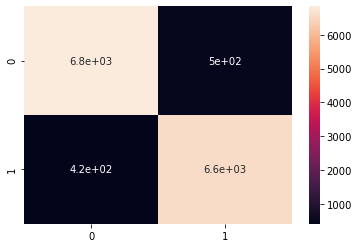

In [74]:
sns.heatmap(cm, annot=True)

## XgBoost

In [75]:
import xgboost as xgb

In [76]:
xg= xgb.XGBClassifier()

In [77]:
xg.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xg.score(X_train, y_train)

0.9961990841887888

In [79]:
pred= xg.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      7338
      normal       0.98      0.98      0.98      6983

    accuracy                           0.98     14321
   macro avg       0.98      0.98      0.98     14321
weighted avg       0.98      0.98      0.98     14321



## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [83]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
dt.score(X_train, y_train)

0.9990422889294586

In [85]:
pred = dt.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

     anomaly       0.97      0.98      0.98      7338
      normal       0.98      0.97      0.97      6983

    accuracy                           0.97     14321
   macro avg       0.97      0.97      0.97     14321
weighted avg       0.97      0.97      0.97     14321



## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
knn.score(X_train, y_train)

0.9865022595995571

In [91]:
pred= knn.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
cr= classification_report(y_test, pred)

In [94]:
print(cr)

              precision    recall  f1-score   support

     anomaly       0.97      0.98      0.98      7338
      normal       0.98      0.97      0.98      6983

    accuracy                           0.98     14321
   macro avg       0.98      0.98      0.98     14321
weighted avg       0.98      0.98      0.98     14321



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import 

## Predictions


In [95]:
ex = [[1,1,0.538,1.01,1,0,52,0,49,23]]

In [96]:
rf.predict(ex)

array(['anomaly'], dtype=object)

In [97]:
dt.predict(ex)

array(['anomaly'], dtype=object)

In [98]:
knn.predict(ex)

array(['anomaly'], dtype=object)

In [99]:
svm.predict(ex)

array(['anomaly'], dtype=object)

In [104]:
ex= [[12,-1.169790,0.352867,-0.315835,-1.078108,0.760019,52,12,0.408554,23]]

In [105]:
rf.predict(ex)

array(['anomaly'], dtype=object)

In [106]:
ex = [[0,1,0.5,1.56,10,1,52,-8,49,123]]

In [107]:
rf.predict(ex)

array(['normal'], dtype=object)

In [102]:
ex= [[1,1,1,1,1,1,1,1,1,1]]

In [103]:
rf.predict(ex)

array(['normal'], dtype=object)

In [108]:
ex= [[0,0,0,0,0,0,0,0,0,0]]

In [109]:
rf.predict(ex)

array(['anomaly'], dtype=object)

In [159]:
x= 21 or 25
print(x)

21
